# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin Sees Third Straight Week of Institutional Capital Flows Amid Market Sentiment Turnaround: CoinShares.  Digital asset manager CoinShares is tracking inflows from institutional investors as capital pours into Bitcoin amid improving sentiment in the crypto markets. CoinShares says Bitcoin appears to be picking up traction again after Federal Reserve Chairman Jerome Powell recently told investors that the Fed has no plans to ban Bitcoin. Data from CoinShares’ weekly digital [&#8230;]The post Bitcoin Sees Third Straight Week of Institutional Capital Flows Amid Market Sentiment Turnaround: CoinShares appeared first on The Daily Hodl. ... [| Skaityti daugiau](https://dailyhodl.com/2021/10/04/bitcoin-sees-third-straight-week-of-institutional-capital-flows-amid-market-sentiment-turnaround-coinshares/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Canada sharing data with countries to ensure mix-dose travellers won't have to quarantine | CBC News.  The Public Health Agency of Canada says it's working with other governments still dubious about allowing Canadians with mixed COVID-19 vaccines to travel across their borders without quarantining. ... [| Skaityti daugiau](http://www.cbc.ca/news/world/coronavirus-covid19-canada-world-1.6198580) 

### Kainų kaita pandemijos metu

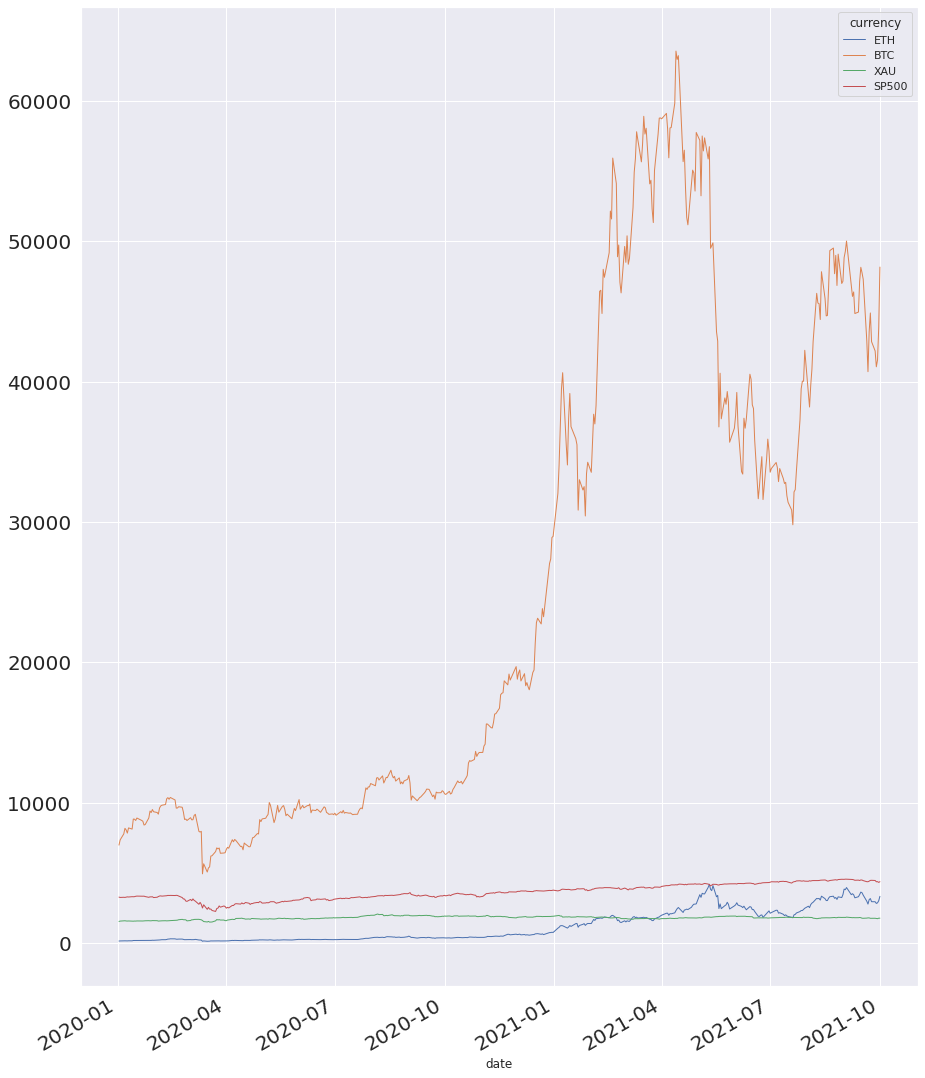

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.885187,0.163938,0.893919
BTC,0.885187,1.000000,0.129993,0.844553
XAU,0.163938,0.129993,1.000000,0.327300
SP500,0.893919,0.844553,0.327300,1.000000


In [8]:
#hide ### Koreliacijos matrica.

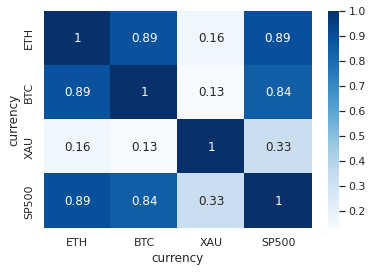

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')